In [2]:
import pandas as pd
import numpy as np

In [8]:
# 這是Kaggle上，預測「鐵達尼號存活率」的，非常經典的例子，
# 我們今天的目標，是利用其中的「性別 Sex」跟「年齡 Age」來預測「存活與否 Survived」(1是存活，0則否）。

df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# 首先，請取出所有的Age跟Sex作為題目，和Survived做為答案並分成三個同名的numpy array。  (10分)
# (提示： Age.shape = (891, ))
Age = df.Age.reshape(len(df.Age),1)
Sex = df.Sex.reshape(len(df.Sex),1)
Survived = df.Survived.reshape(len(df.Survived))

In [15]:
### 其中，由於Age有一些值是空值NaN，請把這些空值都先換成0。   (10分)
# （提示： 可使用 np.isnan(某個你想確認是不是NaN的年齡) ）
nan_index = np.isnan(Age)
Age[nan_index] = 0
Age

array([[ 22.  ],
       [ 38.  ],
       [ 26.  ],
       [ 35.  ],
       [ 35.  ],
       [  0.  ],
       [ 54.  ],
       [  2.  ],
       [ 27.  ],
       [ 14.  ],
       [  4.  ],
       [ 58.  ],
       [ 20.  ],
       [ 39.  ],
       [ 14.  ],
       [ 55.  ],
       [  2.  ],
       [  0.  ],
       [ 31.  ],
       [  0.  ],
       [ 35.  ],
       [ 34.  ],
       [ 15.  ],
       [ 28.  ],
       [  8.  ],
       [ 38.  ],
       [  0.  ],
       [ 19.  ],
       [  0.  ],
       [  0.  ],
       [ 40.  ],
       [  0.  ],
       [  0.  ],
       [ 66.  ],
       [ 28.  ],
       [ 42.  ],
       [  0.  ],
       [ 21.  ],
       [ 18.  ],
       [ 14.  ],
       [ 40.  ],
       [ 27.  ],
       [  0.  ],
       [  3.  ],
       [ 19.  ],
       [  0.  ],
       [  0.  ],
       [  0.  ],
       [  0.  ],
       [ 18.  ],
       [  7.  ],
       [ 21.  ],
       [ 49.  ],
       [ 29.  ],
       [ 65.  ],
       [  0.  ],
       [ 21.  ],
       [ 28.5 ],
       [  5.  

In [18]:
# 再來，Sex部分因為都是文字，不方便我們做svm，請把Male都換成0，Female都換成1   （10分）

Sex[Sex=='female'] = 1
Sex[Sex=='male'] = 0
Sex

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1,

In [21]:
# 由於我們想把Sex跟Age都當成data，請把Sex和Age兩個array合併成一個。（10分）
# （提示：先用np.reshape，再用np.append
Sex = Sex.flatten()
Age = Age.flatten()
data = []
for i in range(len(Sex)):
    data.append([Sex[i],Age[i]])
data = np.array(data)
data

array([[  0.,  22.],
       [  1.,  38.],
       [  1.,  26.],
       ..., 
       [  1.,   0.],
       [  0.,  26.],
       [  0.,  32.]])

0    549
1    342
Name: Survived, dtype: int64


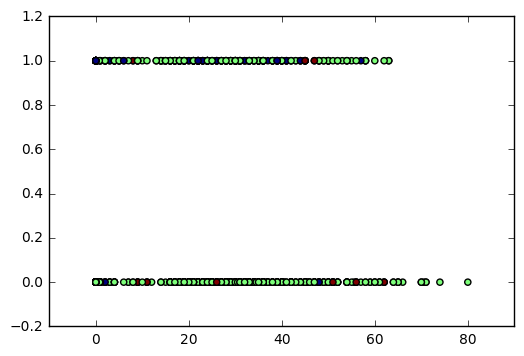

In [22]:
# 實際拿svm 訓練看看，並用同樣的data，preict看看結果（這次不用分training data跟testing data）
#（這次是因為前面做過了，一般都還是要噢！）(10分)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC

clf = SVC()
clf.fit(data,Survived)
preSurvied = clf.predict(data)
plt.scatter(Age,Sex,c=Survived-preSurvied)
print(Survived.value_counts())


In [24]:
# 加分題： 請設計一種方法，比較看看你的預測結果，和正確答案(Survived)，找出你的「預測正確率」是多少。 (10分)
i = 0
col = 0
for s in Survived:
    if (s == preSurvied[i]): col += 1
    i += 1
print("預測正確率為：{:.2f}%".format(col/len(Survived)*100))

預測正確率為：80.81%
